In [1]:
#利用MLP多变量时序预测欺骗干扰
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#导入库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# 导入数据集
#dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')

dataset = pd.read_csv('./data/SMOTE数据拆分7699数据扩充数据合并/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分7699/0-8.csv')
dataset

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,142,1.0,29,2190,190057400,3.0,0,50,28,24.3,...,1,64,0,198.4,3145920,-1.93,0.96,0,0,0
1,143,1.0,29,2190,190058400,4.0,0,50,28,24.2,...,1,64,0,198.1,3145920,-1.83,0.77,0,0,0
2,150,1.0,29,2190,190065400,11.0,0,50,28,24.3,...,1,64,0,201.7,3145920,-0.41,0.02,0,0,0
3,160,1.0,29,2190,190075400,21.0,0,50,28,24.3,...,1,64,0,197.1,3145920,0.49,0.19,0,0,0
4,169,1.0,29,2190,190084400,30.0,0,50,28,24.1,...,1,64,0,201.3,3145920,-0.11,1.37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,90,1.0,29,2190,190005400,6504.6,0,50,28,24.3,...,1,64,0,202.0,3145920,-0.46,1.04,0,0,0
12450,94,1.0,29,2190,190009400,6508.6,0,50,28,24.4,...,1,64,0,201.3,3145920,-0.31,1.36,0,0,0
12451,101,1.0,29,2190,190016400,6515.6,0,50,28,24.2,...,1,64,0,198.3,3145920,-1.11,1.26,0,0,0
12452,119,1.0,29,2190,190034400,6533.6,0,50,28,24.3,...,1,64,0,197.4,3145920,0.30,-0.13,0,0,0


In [4]:
#查看数据集的前5个值
dataset.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,142,1.0,29,2190,190057400,3.0,0,50,28,24.3,...,1,64,0,198.4,3145920,-1.93,0.96,0,0,0
1,143,1.0,29,2190,190058400,4.0,0,50,28,24.2,...,1,64,0,198.1,3145920,-1.83,0.77,0,0,0
2,150,1.0,29,2190,190065400,11.0,0,50,28,24.3,...,1,64,0,201.7,3145920,-0.41,0.02,0,0,0
3,160,1.0,29,2190,190075400,21.0,0,50,28,24.3,...,1,64,0,197.1,3145920,0.49,0.19,0,0,0
4,169,1.0,29,2190,190084400,30.0,0,50,28,24.1,...,1,64,0,201.3,3145920,-0.11,1.37,0,0,0


C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jammer')

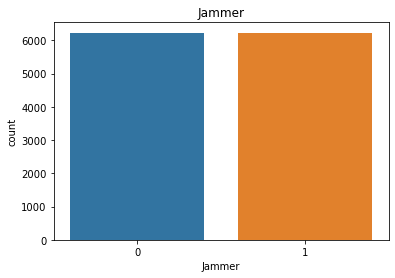

In [5]:
# 样本分布
# 以图方式表示
sns.countplot(dataset["Jammer"])
plt.xlabel("Jammer")
plt.title("Jammer")

In [6]:
# 数据清洗
A = dataset.loc[:, (dataset != 0).any(axis=0)]#删除数据全部为0的列
del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']
data = A
print(data)

       gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0          1.0        29     3.0             0            28  40.072993   
1          1.0        29     4.0             0            28  40.072850   
2          1.0        29    11.0             0            28  40.072293   
3          1.0        29    21.0             0            28  40.073505   
4          1.0        29    30.0             0            28  40.074564   
...        ...       ...     ...           ...           ...        ...   
12449      1.0        29  6504.6             0            28  40.074574   
12450      1.0        29  6508.6             0            28  40.074253   
12451      1.0        29  6515.6             0            28  40.073133   
12452      1.0        29  6533.6             0            28  40.073304   
12453      1.0        29  6551.6             0            28  40.073830   

              Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  \
0      116.103066  198.0

In [7]:
df = data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train = x
y_train = y
x_train.shape

(12454, 36)

In [8]:
x_train.head()

,gpsPdop,gpsNumSv,gpsSec,P_Sol_Status,AvionicsTemp,Lat,Lon,H,tas,Eu[0],...,aileronLeftCmd,elevatorCmd,rudderCmd,lonCmd,XaccBias,YaccBias,ZaccBias,AirHeight,WWest,WSouth
0,1.0,29,3.0,0,28,40.072993,116.103066,198.0,19.92,-13.590559,...,2.652795,-2.160051,-1.105809,0.0,0.0,0.0,0.0,198.4,-1.93,0.96
1,1.0,29,4.0,0,28,40.072850,116.103176,198.1,19.65,-12.014925,...,2.223076,-1.873572,-1.054242,0.0,0.0,0.0,0.0,198.1,-1.83,0.77
2,1.0,29,11.0,0,28,40.072293,116.104514,201.1,20.85,-18.684154,...,1.879302,-1.512609,-1.518338,0.0,0.0,0.0,0.0,201.7,-0.41,0.02
3,1.0,29,21.0,0,28,40.073505,116.105935,197.0,19.82,-16.953821,...,2.681442,-2.028271,-1.243318,0.0,0.0,0.0,0.0,197.1,0.49,0.19
4,1.0,29,30.0,0,28,40.074564,116.104542,201.3,19.98,-15.527156,...,2.119944,-1.546986,-1.575634,0.0,0.0,0.0,0.0,201.3,-0.11,1.37


In [9]:
dataset = pd.read_csv('./data/SMOTE数据拆分7699/9.csv')
dataset.shape

(769, 65)

In [10]:
# 数据清洗

A = dataset.loc[:, (dataset != 0).any(axis=0)]#删除数据全部为0的列

del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
##del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']


dataset = A

print(dataset)
#dataset.to_csv('./data/SMOTE数据拆分7699数据扩充数据合并/测试集7在第一位降维.csv',index=False)

     gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0        1.0        31  1210.2             0            28  40.071637   
1        1.0        31  1223.2             0            28  40.072354   
2        1.0        31  1272.2             0            29  40.072341   
3        1.0        32  2793.6             0            31  40.073017   
4        1.0        30  2207.4             0            30  40.071729   
..       ...       ...     ...           ...           ...        ...   
764      5.0        18   595.8            13            47  40.136965   
765      1.0        31   786.2             0            21  40.070674   
766      2.5         8  5969.2             0            37  40.140445   
767      5.0        18   421.0            13            46  40.137040   
768      1.0        32  2874.6             0            31  40.069540   

            Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  lonCmd  \
0    116.108722  177.0  19.58 -12.393077  

In [11]:
x_test = dataset.iloc[:,:-1]
y_test = dataset.iloc[:,-1]

x_test.shape

(769, 36)

In [12]:
# 数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12454, 36)
(12454,)
(769, 36)
(769,)


In [14]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=36)


#数据的标准化
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)#各个成分方差值
print(sum(var_ratio))#成分方差总和

[[-0.18820559  1.01249942 -1.39601634 ...  1.3522794  -0.9176386
   0.1539243 ]
 [-0.18820559  1.01249942 -1.39561921 ...  1.34876113 -0.88442678
   0.09571758]
 [-0.18820559  1.01249942 -1.39283927 ...  1.39098032 -0.41281897
  -0.13404578]
 ...
 [-0.18820559  1.01249942  1.19035969 ...  1.35110664 -0.64530169
   0.24582964]
 [-0.18820559  1.01249942  1.19750811 ...  1.34055184 -0.17701506
  -0.17999845]
 [-0.18820559  1.01249942  1.20465653 ...  1.38159828 -0.4991697
   0.23357559]]
[1.45785117e+01 3.28364749e+00 2.79498400e+00 1.86774861e+00
 1.61720314e+00 1.39185004e+00 1.11025441e+00 1.02309966e+00
 1.00845330e+00 9.36447528e-01 8.30592385e-01 7.39130118e-01
 6.85772956e-01 5.43796315e-01 4.85894858e-01 4.49483759e-01
 4.31396583e-01 4.16276437e-01 3.64983226e-01 3.28958236e-01
 2.52992916e-01 2.04787916e-01 1.67223281e-01 1.16111270e-01
 8.65197088e-02 7.75388201e-02 5.34981406e-02 4.52821493e-02
 2.72485867e-02 2.60595105e-02 2.06776554e-02 1.53469384e-02
 8.72101746e-03 6.3232

(12454, 15)
[0.40492614 0.09120511 0.07763221 0.05187774 0.0449187  0.0386594
 0.03083792 0.02841715 0.02801034 0.02601034 0.02307016 0.02052974
 0.01904772 0.01510424 0.01349599]
<class 'numpy.ndarray'>
0.9136


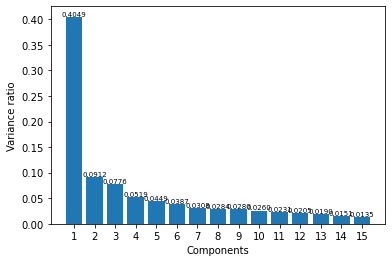

In [15]:
# 训练集数据降维到25维
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape)


#print(X_test_pca.shape)


# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 16))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
#plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
#                                   "16","17","18","19","20","21","22","23","24","25"])
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

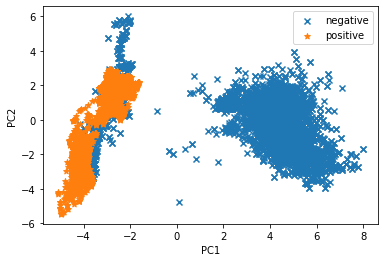

In [16]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [17]:
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(769, 15)


In [18]:
#GBDT
#https://blog.csdn.net/olizxq/article/details/89222908


def my_lgb(feature_train,target_train,feature_test,target_test):
    import lightgbm as lgb
    from sklearn import metrics
    
    lgb_param_grid1 = {'n_estimators':[50,100,200,400,800],}
    lgb_best = GridSearchCV(gbdt,param_grid = lgb_param_grid1,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    lgb_best.fit(feature_train,target_train)
    
    lgb_param_grid2 = {'max_depth':[5,10,15,20,25],
               'min_samples_split':range(100,801,200)}
    gbdt_best2 = GridSearchCV(gbdt_best.best_estimator_,param_grid = gbdt_param_grid2,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    gbdt_best2.fit(feature_train,target_train)
    
    gbdt_param_grid3 = {'min_samples_split':range(300,1701,200),
               'min_samples_leaf':range(60,101,10)}
    gbdt_best3 = GridSearchCV(gbdt_best2.best_estimator_,param_grid = gbdt_param_grid3,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    gbdt_best3.fit(feature_train,target_train)
    
    gbdt_param_grid4 = {'max_features':range(7,20,2)}
    gbdt_best4 = GridSearchCV(gbdt_best3.best_estimator_,param_grid = gbdt_param_grid4,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    gbdt_best4.fit(feature_train,target_train)
    
    gbdt_param_grid5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
    gbdt_best5 = GridSearchCV(gbdt_best4.best_estimator_,param_grid = gbdt_param_grid5,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    gbdt_best5.fit(feature_train,target_train)
    
    gbdt_param_grid6 = {'learning_rate':[0.001,0.01,0.1,0.25]}
    gbdt_best6 = GridSearchCV(gbdt_best5.best_estimator_,param_grid = gbdt_param_grid6,cv = 3,scoring="roc_auc",n_jobs= -1, verbose=100)
    gbdt_best6.fit(feature_train,target_train)
    
    print(gbdt_best6.best_estimator_)
    print(gbdt_best6.best_params_,"  ","得分：",gbdt_best6.best_score_)
    y_predict = gbdt_best6.predict(feature_test)     # 进行预测
    y_prob = gbdt_best6.predict_proba(feature_test)     # 进行预测
    result_evaluation(target_test,y_prob,y_predict)
    
    return gbdt_best6.best_params_,gbdt_best6,y_prob

In [19]:
#my_gbdt(X_train_pca,y_train,X_test_pca,y_test)

In [20]:
#降维后的模型建立与训练
from sklearn.ensemble import GradientBoostingClassifier

PCA_GBDT = GradientBoostingClassifier(max_depth=10, min_samples_leaf=70,
                           min_samples_split=100, n_estimators=50,
                           subsample=0.75,learning_rate = 0.05)
PCA_GBDT.fit(X_train_pca,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           min_samples_leaf=70, min_samples_split=100,
                           n_estimators=50, subsample=0.75)

In [21]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_GBDT.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[677  10]
 [  0  82]]


In [23]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\nKNN分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  759
错误预测值的数量:  10


In [24]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9854    0.9927       687
           1     0.8913    1.0000    0.9425        82

    accuracy                         0.9870       769
   macro avg     0.9457    0.9927    0.9676       769
weighted avg     0.9884    0.9870    0.9873       769



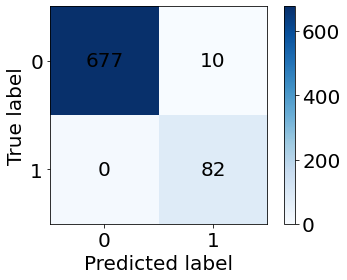

In [25]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [26]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.974  0.961  0.961  0.974  0.961  0.961  0.974  0.9221 0.961  0.9605]


10折交叉验证平均准确率： 0.961


In [27]:
precision = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [0.7778 0.8571 0.75   0.7273 1.     1.     0.7    0.625  0.875  0.8571]


10折交叉验证平均精确率： 0.8169


In [28]:
recall = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.875  0.75   0.75   1.     0.875  0.5    0.875  0.6667 0.7778 0.75  ]


10折交叉验证平均召回率： 0.782


In [29]:
f1 = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.8235 0.8571 0.8    0.8421 1.     0.7692 0.7778 0.6667 0.8235 0.8   ]


10折交叉验证平均f1值： 0.816


In [30]:
roc_auc = cross_val_score(PCA_GBDT,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [0.9891 0.9873 0.981  0.9973 1.     0.8605 0.9909 0.9706 0.9877 0.9853]


10折交叉验证平均ROC_AUC值： 0.975


[1]


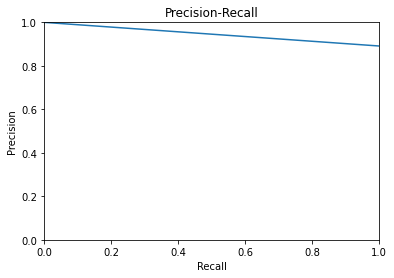

In [31]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()